In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28* 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28* 28)).astype('float32') / 255

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_test.shape

(10000, 10)

In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(74, activation='relu', input_shape=(28*28,)),
    Dense(32, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50


1875/1875 [==============================] - 25s 12ms/step - loss: 0.2485 - accuracy: 0.9266 - val_loss: 0.1115 - val_accuracy: 0.9664
Epoch 2/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1028 - accuracy: 0.9683 - val_loss: 0.0823 - val_accuracy: 0.9749
Epoch 3/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.0897 - val_accuracy: 0.9721
Epoch 4/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.1078 - val_accuracy: 0.9669
Epoch 5/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0475 - accuracy: 0.9843 - val_loss: 0.0844 - val_accuracy: 0.9729
Epoch 6/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0904 - val_accuracy: 0.9749
Epoch 7/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0953

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1459 - accuracy: 0.9804
Test accuracy: 0.980400025844574


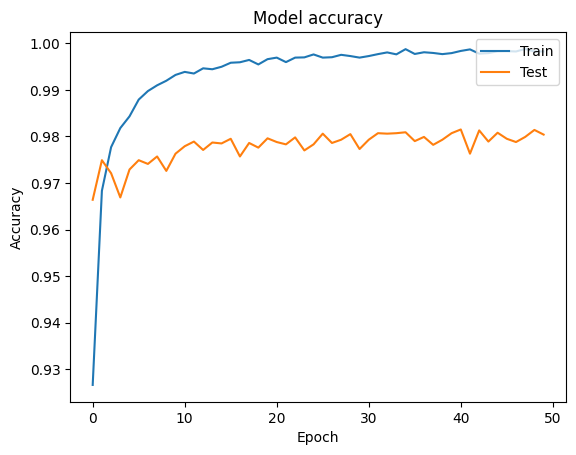

Saved model to disk


c:\Users\saturn\miniconda3\envs\deep_learning_course\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [24]:
#plot a graph to visualize the epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
#savr plot
plt.savefig('Multi-layer neural network_1.jpg')


# save the trained model for future use 
model.save("Multi-Layer-Neural-Network-models-for-Image-Classification-Problems/CNN_Model.h5")
print("Saved model to disk")